<a href="https://colab.research.google.com/github/Prasadayus/C4GT/blob/main/PR_PRoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

KeyboardInterrupt: 

In [1]:
!mkdir Datasets

In [20]:
import os
%cd /content


/content


In [8]:
!unzip Prateek.zip



Archive:  Prateek.zip
replace Prateek/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/1.jpg           
replace Prateek/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/10.jpg          
replace Prateek/11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/11.jpg          
replace Prateek/12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/12.jpg          
replace Prateek/13.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/13.jpg          
replace Prateek/14.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/14.jpg          
replace Prateek/15.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/15.jpg          
replace Prateek/16.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/16.jpg          
replace Prateek/17.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Prateek/17.jpg          
replace Prateek/18.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename:

In [ ]:
import shutil

# Specify the directory path you want to delete
directory_to_delete = '/content/Datasets/Train/Su'

# Use shutil.rmtree to delete the directory and its contents
shutil.rmtree(directory_to_delete)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/My Folder"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/My Folder"

# Write a sample file to Google Drive
with open('/content/drive/My Drive/My Folder/sample.txt', 'w') as f:
  f.write('Hello, World!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<ipython-input-21-676ee0add211>:81: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
3/3 [==============================] - 35s 11s/step - loss: 1.7058 - accuracy: 0.4691 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 2/5
3/3 [==============================] - 36s 12s/step - loss: 0.5520 - accuracy: 0.8148 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 41s 17s/step - loss: 0.1807 - accuracy: 0.9259 - val_loss: 0.0567 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 36s 14s/step - loss: 0.1228 - accuracy: 0.9753 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 35s 11s/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000


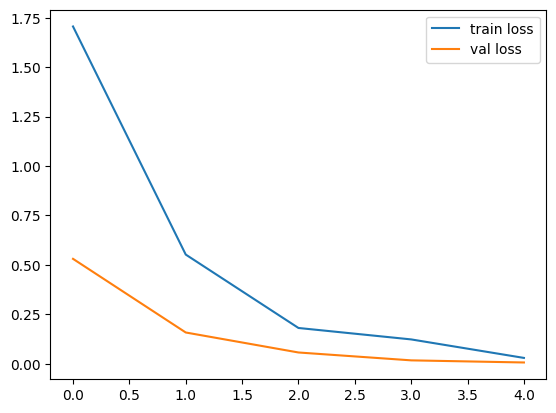

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [21]:


from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



  # useful for getting number of classes
folders = glob('/content/Datasets/Train/*')


num_classes = 5

# ...

# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)
# x = Dense(1000, activation='relu')(x)
# prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<ipython-input-25-25dce2277cfb>:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
3/3 [==============================] - 37s 11s/step - loss: 6.6418 - accuracy: 0.2840 - val_loss: 9.2537 - val_accuracy: 0.2500
Epoch 2/5
3/3 [==============================] - 37s 15s/step - loss: 5.9619 - accuracy: 0.2963 - val_loss: 0.4214 - val_accuracy: 0.7500
Epoch 3/5
3/3 [==============================] - 38s 12s/step - loss: 1.6558 - accuracy: 0.6790 - val_loss: 1.8691 - val_accuracy: 0.7500
Epoch 4/5
3/3 [==============================] - 38s 12s/step - loss: 1.6863 - accuracy: 0.7284 - val_loss: 0.0844 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 38s 12s/step - loss: 0.6783 - accuracy: 0.7901 - val_loss: 0.0064 - val_accuracy: 1.0000


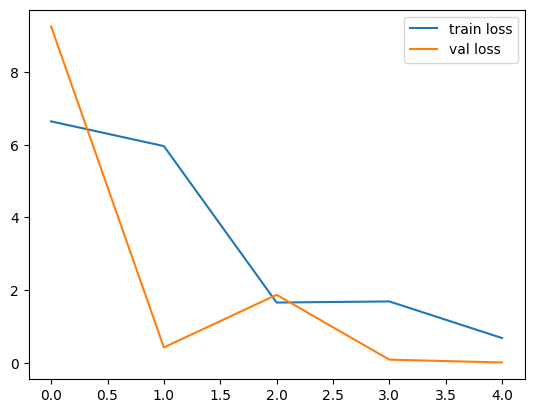

<Figure size 640x480 with 0 Axes>

In [25]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# useful for getting number of classes
folders = glob('/content/Datasets/Train/*')
num_classes = 5

# our layers - you can add more if you want
x = Flatten()(vgg.output)
classifier = Dense(1024, activation='relu')(x)
classifier = Dropout(0.3)(classifier)
classifier = Dense(512, activation='relu')(classifier)
classifier = Dropout(0.3)(classifier)
prediction = Dense(num_classes, activation='softmax')(classifier)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# fit the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal2_loss')

# Save the Keras model
model.save('facefeatures_new_model.h6')


In [16]:
logits_shape = model.output.shape
labels_shape = training_set.labels.shape

print("Logits shape:", logits_shape)
print("Labels shape:", labels_shape)

Logits shape: (None, 5)
Labels shape: (81,)


In [26]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Copy files/folders to Google Drive
!cp -r /content/my_folder /content


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/my_folder': No such file or directory


In [28]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Copy files/folders to Google Drive
!cp -r /content/my_folder /content/drive/MyDrive/PR


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/my_folder': No such file or directory


In [ ]:
!zip -r my_folder.zip /content

	zip warning: name not matched: /content/drive/MyDrive/Chemistry/Physics/Gravitation/Gravitation sol.pdf
	zip warning: name not matched: /content/drive/MyDrive/Chemistry/Physics/Maths/Point/Straight lines.pdf
  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.01.31/ (stored 0%)
  adding: content/.config/logs/2024.01.31/14.22.52.594825.log (deflated 57%)
  adding: content/.config/logs/2024.01.31/14.23.06.765855.log (deflated 57%)
  adding: content/.config/logs/2024.01.31/14.21.51.828602.log (deflated 91%)
  adding: content/.config/logs/2024.01.31/14.23.07.771045.log (deflated 56%)
  adding: content/.config/logs/2024.01.31/14.22.23.288158.log (deflated 58%)
  adding: content/.config/logs/2024.01.31/14.22.36.618045.log (deflated 85%)
 

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!cp -r content /content/drive/MyDrive/



cp: cannot stat 'content': No such file or directory
